In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import glob 
import scipy as scp

globbed_files = glob.glob("Results_RF/*.csv") 

mean = []
for csv in globbed_files:
    frame = pd.read_csv(csv, index_col=0)
    mean.append(frame.mean())

DF_mean = pd.DataFrame(mean)
DF_mean.tail(10)

,time_elapsed,Accuracy,Se0,Se1,Se2,Se3,Se4,Se5,Sp0,Sp1,Sp2,Sp3,Sp4,Sp5
0,1.208105,0.680174,0.861827,0.033849,0.687232,0.343883,0.778570,0.517441,0.849359,0.994543,0.837499,0.968659,0.980947,0.933923
1,1.183132,0.644641,0.850363,0.031871,0.666299,0.216684,0.716964,0.451924,0.844735,0.994572,0.811452,0.967471,0.968597,0.931624
2,1.224606,0.635106,0.860495,0.026688,0.644555,0.185572,0.680648,0.446606,0.827277,0.994001,0.810329,0.970937,0.968837,0.931442
3,1.278225,0.688924,0.874035,0.066645,0.718816,0.352235,0.754584,0.489710,0.904407,0.991539,0.827352,0.961707,0.979756,0.922085
4,1.303156,0.699269,0.895444,0.042430,0.738036,0.345736,0.757082,0.479460,0.897109,0.993654,0.825415,0.964469,0.980132,0.935890
5,1.321971,0.690107,0.899501,0.041548,0.718409,0.330556,0.743751,0.464959,0.891660,0.992786,0.826979,0.964073,0.979420,0.930130
6,1.310123,0.717462,0.912895,0.073634,0.712647,0.403285,0.786232,0.553358,0.884619,0.992253,0.857364,0.967069,0.982209,0.937190
7,1.299888,0.706236,0.912424,0.062108,0.704404,0.364336,0.767569,0.530368,0.883399,0.992491,0.849609,0.966222,0.980603,0.933635
8,1.299755,0.700480,0.903777,0.064559,0.713045,0.340247,0.744197,0.520050,0.881905,0.991833,0.847829,0.963496,0.977151,0.936965
9,1.286175,0.694491,0.915622,0.076452,0.703620,0.340577,0.744718,0.472890,0.897794,0.991122,0.824553,0.965738,0.981312,0.930590


In [2]:
DF_mean['SE_avg'] = DF_mean[['Se0', 'Se1', 'Se2', 'Se3', 'Se4', 'Se5']].mean(axis=1)
DF_mean['SP_avg'] = DF_mean[['Sp0', 'Sp1', 'Sp2', 'Sp3', 'Sp4', 'Sp5']].mean(axis=1)
DF_mean['channel'] = ['C3-C4','Cz-C3','Cz-C4','Cz-Fpz','Fpz-C3','Fpz-C4','Oz-C3','Oz-C4','Oz-Cz','Oz-Fpz']
DF_mean.set_index('channel')

,time_elapsed,Accuracy,Se0,Se1,Se2,Se3,Se4,Se5,Sp0,Sp1,Sp2,Sp3,Sp4,Sp5,SE_avg,SP_avg
channel,,,,,,,,,,,,,,,,
C3-C4,1.208105,0.680174,0.861827,0.033849,0.687232,0.343883,0.778570,0.517441,0.849359,0.994543,0.837499,0.968659,0.980947,0.933923,0.537134,0.927489
Cz-C3,1.183132,0.644641,0.850363,0.031871,0.666299,0.216684,0.716964,0.451924,0.844735,0.994572,0.811452,0.967471,0.968597,0.931624,0.489017,0.919742
Cz-C4,1.224606,0.635106,0.860495,0.026688,0.644555,0.185572,0.680648,0.446606,0.827277,0.994001,0.810329,0.970937,0.968837,0.931442,0.474094,0.917137
Cz-Fpz,1.278225,0.688924,0.874035,0.066645,0.718816,0.352235,0.754584,0.489710,0.904407,0.991539,0.827352,0.961707,0.979756,0.922085,0.542671,0.931141
Fpz-C3,1.303156,0.699269,0.895444,0.042430,0.738036,0.345736,0.757082,0.479460,0.897109,0.993654,0.825415,0.964469,0.980132,0.935890,0.543031,0.932778
Fpz-C4,1.321971,0.690107,0.899501,0.041548,0.718409,0.330556,0.743751,0.464959,0.891660,0.992786,0.826979,0.964073,0.979420,0.930130,0.533121,0.930841
Oz-C3,1.310123,0.717462,0.912895,0.073634,0.712647,0.403285,0.786232,0.553358,0.884619,0.992253,0.857364,0.967069,0.982209,0.937190,0.573675,0.936784
Oz-C4,1.299888,0.706236,0.912424,0.062108,0.704404,0.364336,0.767569,0.530368,0.883399,0.992491,0.849609,0.966222,0.980603,0.933635,0.556868,0.934327
Oz-Cz,1.299755,0.700480,0.903777,0.064559,0.713045,0.340247,0.744197,0.520050,0.881905,0.991833,0.847829,0.963496,0.977151,0.936965,0.547646,0.933196


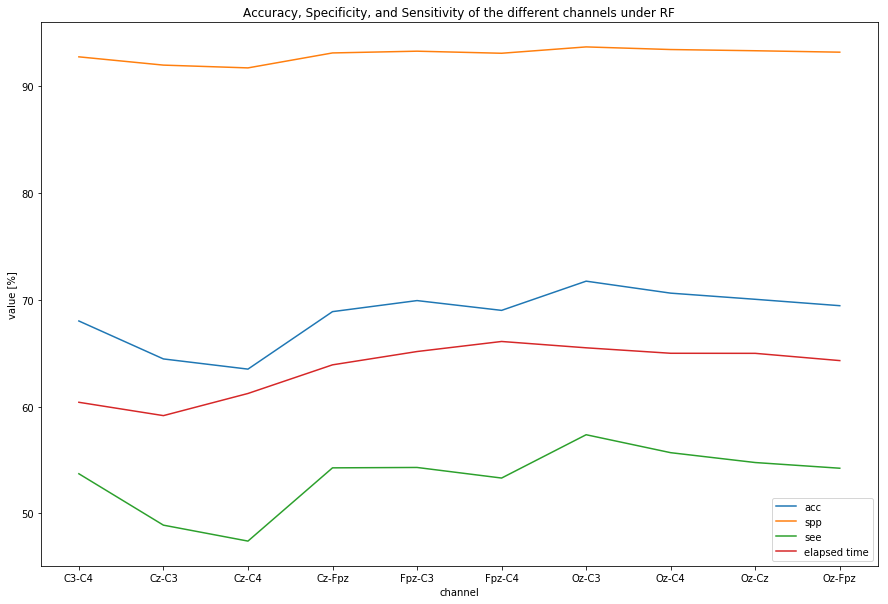

In [3]:
acc = DF_mean['Accuracy']
spp = DF_mean['SP_avg']
see = DF_mean['SE_avg']
time = DF_mean['time_elapsed']
labels = DF_mean['channel']
plt.figure(figsize = (15,10))
plt.plot(labels, np.multiply(acc, 100))
plt.plot(labels, np.multiply(spp, 100))
plt.plot(labels, np.multiply(see, 100))
plt.plot(labels, np.multiply(time, 50))
plt.legend(['acc', 'spp', 'see', 'elapsed time'])
plt.title('Accuracy, Specificity, and Sensitivity of the different channels under RF')
plt.ylabel('value [%]')
plt.xlabel('channel')
plt.show()

# evaluation

The channels are only tested on the RF classification because the KNN one yields exactly identical results on all parts and the SVM takes too long to train even for a single run
Ideally both of the other ones would have been tested 
Howwever as of now only the KNN is with only a single run 

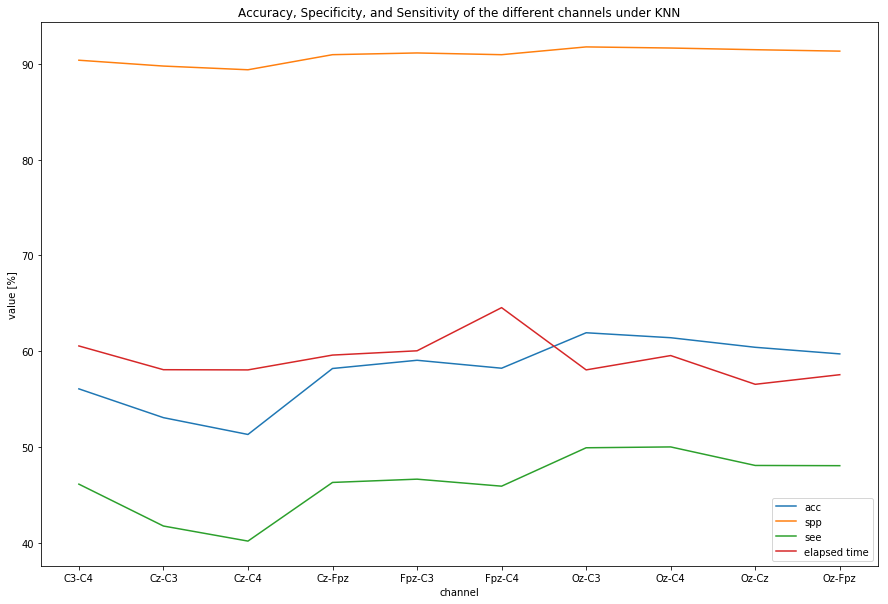

In [4]:
globbed_files = glob.glob("Results_KNN/*.csv") 

mean = []
for csv in globbed_files:
    frame = pd.read_csv(csv, index_col=0)
    mean.append(frame.mean())

DF_mean = pd.DataFrame(mean)

DF_mean['SE_avg'] = DF_mean[['Se0', 'Se1', 'Se2', 'Se3', 'Se4', 'Se5']].mean(axis=1)
DF_mean['SP_avg'] = DF_mean[['Sp0', 'Sp1', 'Sp2', 'Sp3', 'Sp4', 'Sp5']].mean(axis=1)
DF_mean.tail(10)

DF_mean['channel'] = ['C3-C4','Cz-C3','Cz-C4','Cz-Fpz','Fpz-C3','Fpz-C4','Oz-C3','Oz-C4','Oz-Cz','Oz-Fpz']
DF_mean.set_index('channel')
acc = DF_mean['Accuracy']
spp = DF_mean['SP_avg']
see = DF_mean['SE_avg']
time = DF_mean['time_elapsed']
labels = DF_mean['channel']
plt.figure(figsize = (15,10))
plt.plot(labels, np.multiply(acc, 100))
plt.plot(labels, np.multiply(spp, 100))
plt.plot(labels, np.multiply(see, 100))
plt.plot(labels, np.multiply(time, 1000))
plt.legend(['acc', 'spp', 'see', 'elapsed time'])
plt.title('Accuracy, Specificity, and Sensitivity of the different channels under KNN')
plt.ylabel('value [%]')
plt.xlabel('channel')
plt.show()

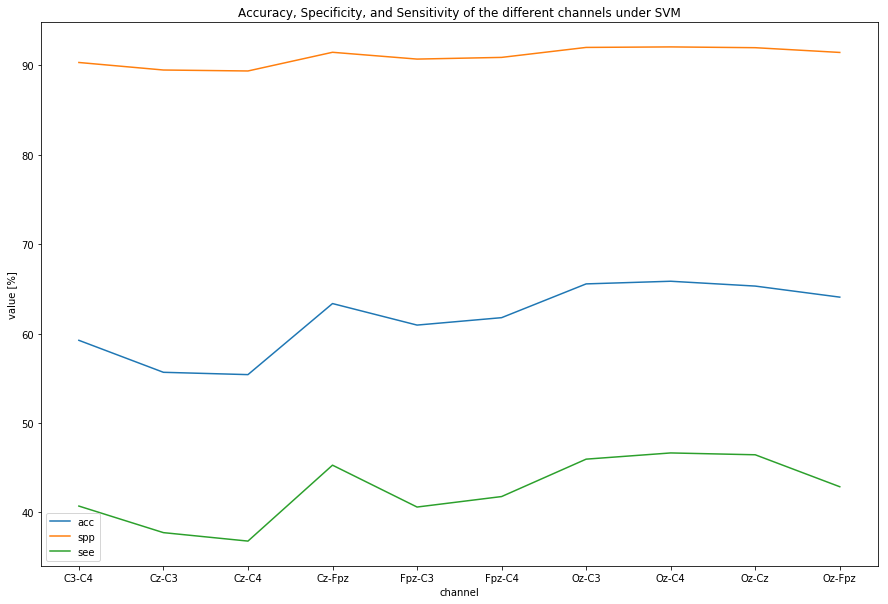

In [5]:
globbed_files = glob.glob("Results_SVM/*.csv") 

mean = []
for csv in globbed_files:
    frame = pd.read_csv(csv, index_col=0)
    mean.append(frame.mean())

DF_mean = pd.DataFrame(mean)

DF_mean['SE_avg'] = DF_mean[['Se0', 'Se1', 'Se2', 'Se3', 'Se4', 'Se5']].mean(axis=1)
DF_mean['SP_avg'] = DF_mean[['Sp0', 'Sp1', 'Sp2', 'Sp3', 'Sp4', 'Sp5']].mean(axis=1)
DF_mean.tail(10)

DF_mean['channel'] = ['C3-C4','Cz-C3','Cz-C4','Cz-Fpz','Fpz-C3','Fpz-C4','Oz-C3','Oz-C4','Oz-Cz','Oz-Fpz']
DF_mean.set_index('channel')
acc = DF_mean['Accuracy']
spp = DF_mean['SP_avg']
see = DF_mean['SE_avg']
time = DF_mean['time_elapsed']
labels = DF_mean['channel']
plt.figure(figsize = (15,10))
plt.plot(labels, np.multiply(acc, 100))
plt.plot(labels, np.multiply(spp, 100))
plt.plot(labels, np.multiply(see, 100))
# plt.plot(labels, np.multiply(time, 1000))
plt.legend(['acc', 'spp', 'see', 'elapsed time'])
plt.title('Accuracy, Specificity, and Sensitivity of the different channels under SVM')
plt.ylabel('value [%]')
plt.xlabel('channel')
plt.show()